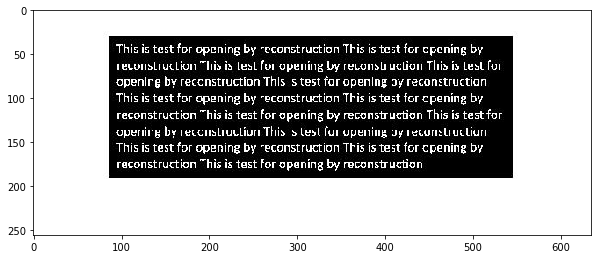

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread('Opening_original.jpg',0)
plt.figure(figsize=(10,10))
plt.imshow(img,'gray')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


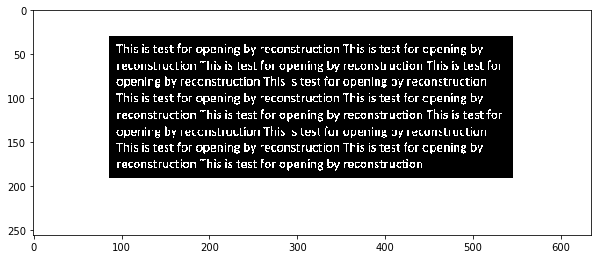

In [67]:
(thresh, thresh_img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(thresh_img,'gray')
print(thresh_img)

In [68]:
kernel_dil= np.array([[255, 255, 255],
                       [255, 255, 255],
                       [255, 255, 255]], dtype = np.uint8)
kernel_ero= np.array([[0, 255, 0],
                      [255, 255, 255],
                      [0, 255, 0]], dtype = np.uint8)

In [69]:
def dilation(thresh_img):
    padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = thresh_img[i][j]

    
    
    dilated_img=np.zeros(img.shape,'uint8')
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.sometrue(np.equal(kernel_dil,padded_arr[i:i+3,j:j+3]))):
                dilated_img[i][j]=255
            else:
                dilated_img[i][j]=0
    return dilated_img

In [70]:
def erosion(thresh_img):
    padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = thresh_img[i][j]

   
    eroded_img=np.zeros(img.shape,'uint8')
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.alltrue(np.equal(kernel_dil,padded_arr[i:i+3,j:j+3]))):
                eroded_img[i][j]=255
            else:
                eroded_img[i][j]=0
    return eroded_img


In [71]:
def plot(img):  
    plt.figure(figsize=(20,20))

    plt.subplot(5,2,1)
    plt.title('original')
    plt.imshow(img,'gray')

    plt.subplot(5,2,2)
    plt.title('black_white')
    (thresh, thresh_bw) = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh_bw,'gray')
    
    plt.subplot(5,2,3)
    plt.title('erosion')
    e=erosion(thresh_img)
    plt.imshow(e,'gray')
    
    plt.subplot(5,2,4)
    plt.title('dilation')
    d=dilation(thresh_img)
    plt.imshow(d,'gray')
    
    plt.subplot(5,2,5)
    plt.title('opening')
    open_img=dilation(erosion(thresh_img))
    plt.imshow(open_img,'gray')
    
    plt.subplot(5,2,6)
    plt.title('closing')
    close_img=erosion(dilation(thresh_img))
    plt.imshow(close_img,'gray')

    plt.subplot(5,2,7)
    plt.title('lib_erosion')
    er=cv2.erode(thresh_img, kernel_ero, iterations=1)
    plt.imshow(er,'gray')
    
    plt.subplot(5,2,8)
    plt.title('lib_dilation')
    dil=cv2.dilate(thresh_img, kernel_dil, iterations=1)
    plt.imshow(dil,'gray')
    
    plt.subplot(5,2,9)
    plt.title('lib_opening')
    open=cv2.dilate(er, kernel_dil, iterations=1)
    plt.imshow(open,'gray')
    
    plt.subplot(5,2,10)
    plt.title('lib_closing')
    close=cv2.erode(dil, kernel_dil, iterations=1)
    plt.imshow(close,'gray')
    
    plt.tight_layout()

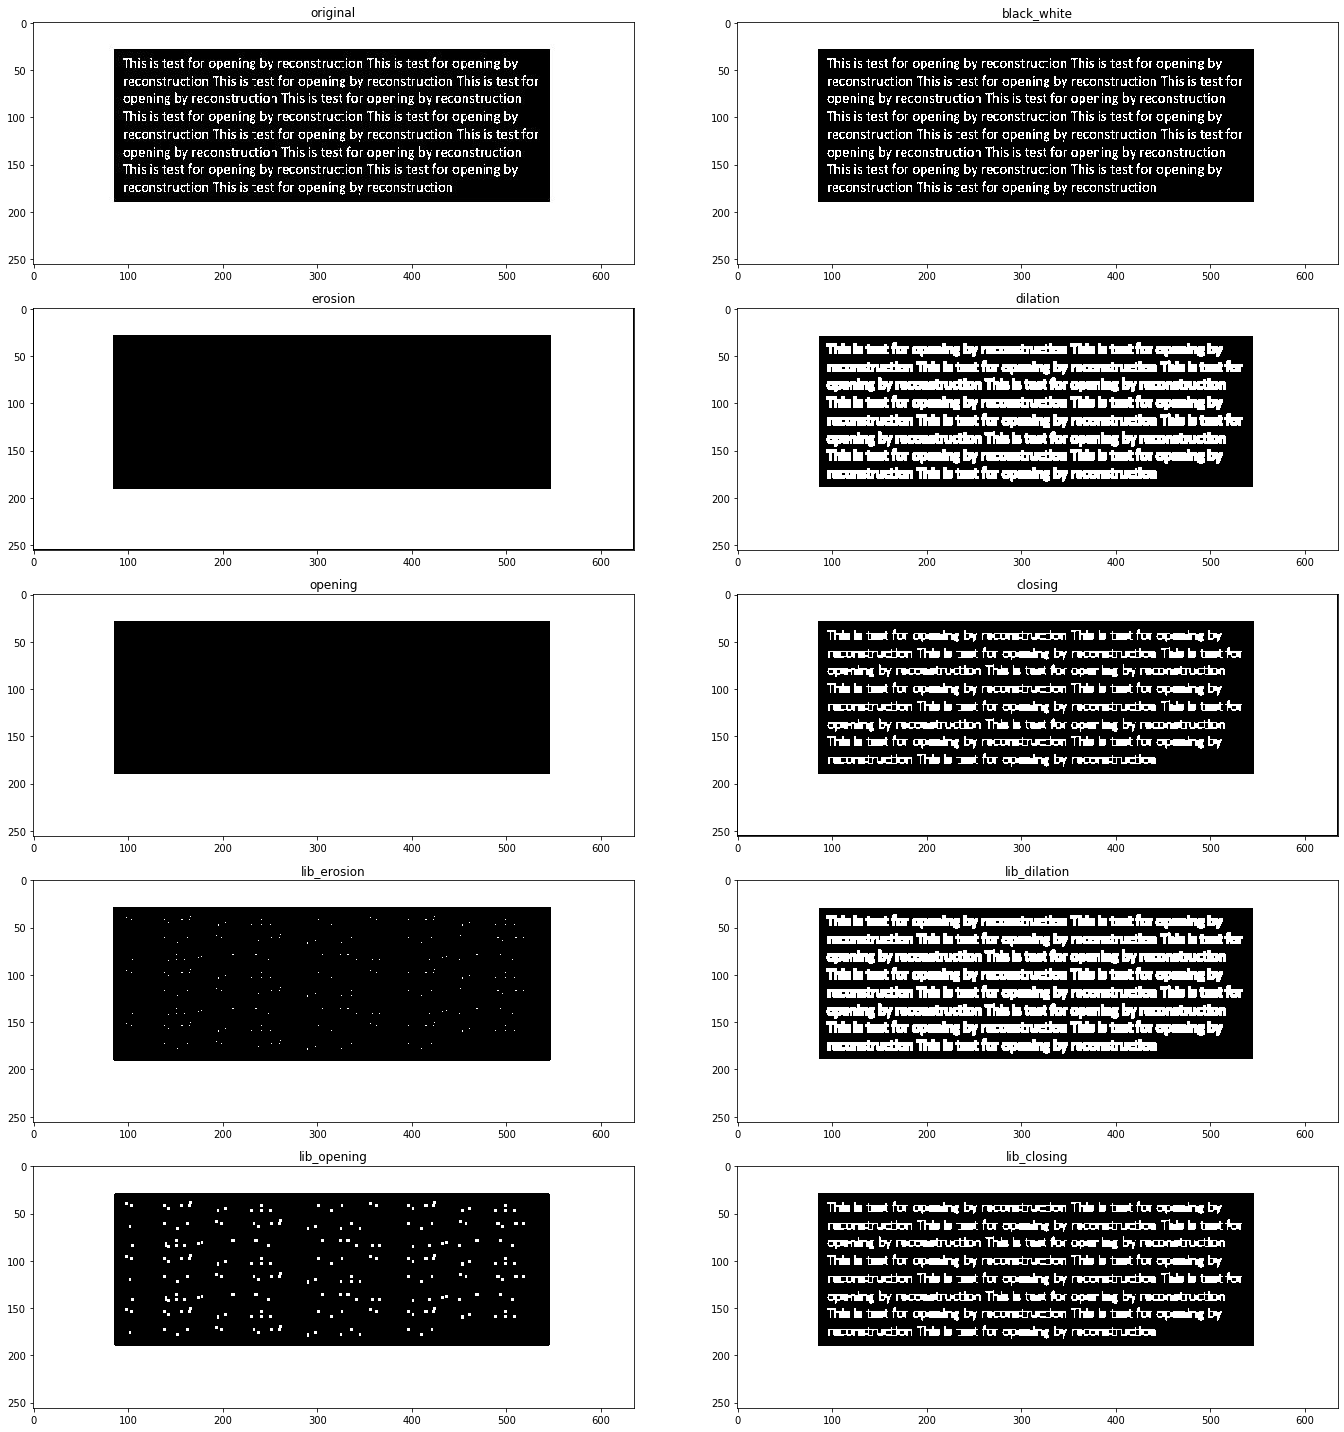

In [72]:
plot(img)